In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def hist_to_pdf(ax, X, **kwargs):
    """
    Draws a histogram where the area of each rectangle
    is the probability of falling within.
    axis: ax
    X: data
    """
    freqs, bins, rects = ax.hist(X, **kwargs)
    total = sum(freqs)
    for r, freq in zip(rects, freqs):
        # As we're approximating a pdf, the height of the rectangle times
        # its width must approximate the probability of falling within
        # that rectangle. That is, height * width = freq / total.
        r.set_height((freq / total) / r.get_width())
    max_height = np.max([(freq / total) / r.get_width() for r, freq in zip(rects, freqs)])
    ax.set_ylim(0, 1.25 * max_height)

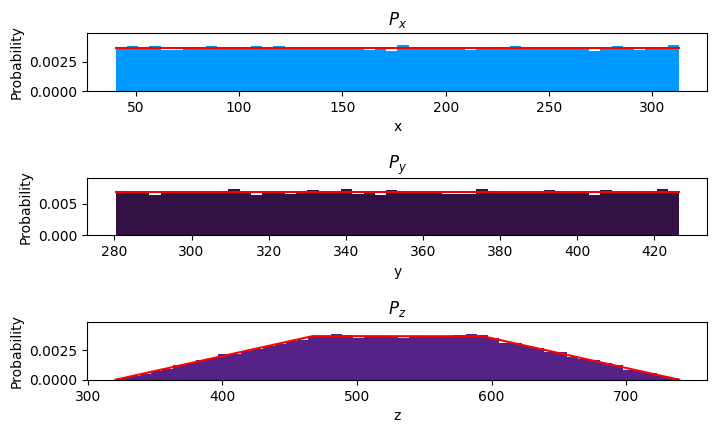

In [9]:
n = 50000
nbins = 50

a, b, c, d = np.random.uniform(0, 500, 4)
a, b = [np.min([a, b]), np.max([a, b])]
c, d = [np.min([c, d]), np.max([c, d])]

k = 1 / ((b - a) * (d - c))

X = np.random.uniform(a, b, n)
Y = np.random.uniform(c, d, n)
Z = X + Y

fig, axs = plt.subplots(3, figsize = (8, 4.5), dpi = 100)

for ax, var, varname, color in zip(axs, [X, Y, Z], ["x", "y", "z"], ["#09f", "#314", "#528"]):
    hist_to_pdf(ax, var, bins = nbins, color = color, label = "Simulation")
    ax.set(xlabel = varname, ylabel = "Probability", title = f"$P_{varname}$")
    ax.margins(0.05, 0.75)

# pdfs
@np.vectorize
def const_ab(x):
    return 1 / (b - a)

@np.vectorize
def const_cd(y):
    return 1 / (d - c)

@np.vectorize
def convolution(z):
    if a + c <= z < np.min([a + d, b + c]):
        return k * (z - (c + a))
    if np.min([a + d, b + c]) <= z < np.max([a + d, b + c]):
        return k * np.min([b - a, d - c])
    if np.max([a + d, b + c]) <= z < b + d:
        return k * ((b + d) - z)
    else:
        return 0
 
x = np.linspace(a, b, 300)
y = np.linspace(c, d, 300)
z = np.linspace(a + c, b + d, 1000)
axs[0].plot(x, const_ab(x), color = "r", label = "pdf")
axs[1].plot(y, const_cd(y), "r-", label = "pdf")
axs[2].plot(z, convolution(z), "r-", label = "pdf")

# for ax in axs:
    # ax.legend()

plt.subplots_adjust(hspace = 1.5)

In [2]:
# tests
from scipy import stats
n = 300000
nbins = 50
mean = 50
stdv = 100
X = np.random.normal(mean, stdv, n)
x = np.linspace(mean - 5 * stdv, mean + 5 * stdv, 10000)

@np.vectorize
def gaussian(x, mean, stdv):
    return  (1 / (stdv * np.sqrt(2 * np.pi))) * np.e**(-(1 / 2) * ((x - mean) / stdv)**2)

fig, ax = plt.subplots()
ax.plot(x, gaussian(x, mean, stdv), "r-")
hist_to_pdf(ax, X, bins = nbins)
ax.set(xlim = (mean - 5 * stdv, mean + 5 * stdv))

NameError: name 'np' is not defined